In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

path = "nse500_analysis_20190909-checkpoint.csv"

In [2]:
df = pd.read_csv(path)

In [40]:
df.head()

,industry,symbol,price,price_1yr_ago,high52,pe,mc,Return,Returnx,pex
0,SERVICES,NSE:3MINDIA,20615.0,24892.10,25750.00,66.27,23233.622400,-0.171826,True,True
1,INDUSTRIAL MANUFACTURING,NSE:ABB,1327.0,1390.50,1670.00,50.88,28090.426990,-0.045667,True,True
2,CEMENT & CEMENT PRODUCTS,NSE:ACC,1475.0,1519.40,1769.05,15.92,27703.221260,-0.029222,True,True
3,INDUSTRIAL MANUFACTURING,NSE:AIAENG,1502.9,1742.55,1865.00,25.93,14175.411640,-0.137528,True,True
4,METALS,NSE:APLAPOLLO,1292.0,1539.20,1687.95,20.52,3094.384832,-0.160603,True,True


In [41]:
df.columns

Index(['industry', 'symbol', 'price', 'price_1yr_ago', 'high52', 'pe', 'mc',
       'Return', 'Returnx', 'pex'],
      dtype='object')

In [42]:
df = df.dropna()

In [43]:
df.head()

,industry,symbol,price,price_1yr_ago,high52,pe,mc,Return,Returnx,pex
0,SERVICES,NSE:3MINDIA,20615.0,24892.10,25750.00,66.27,23233.622400,-0.171826,True,True
1,INDUSTRIAL MANUFACTURING,NSE:ABB,1327.0,1390.50,1670.00,50.88,28090.426990,-0.045667,True,True
2,CEMENT & CEMENT PRODUCTS,NSE:ACC,1475.0,1519.40,1769.05,15.92,27703.221260,-0.029222,True,True
3,INDUSTRIAL MANUFACTURING,NSE:AIAENG,1502.9,1742.55,1865.00,25.93,14175.411640,-0.137528,True,True
4,METALS,NSE:APLAPOLLO,1292.0,1539.20,1687.95,20.52,3094.384832,-0.160603,True,True


In [44]:
m = df.price_1yr_ago
n = df.price

df["Return"] = (n-m)/m

In [45]:
df.head()

,industry,symbol,price,price_1yr_ago,high52,pe,mc,Return,Returnx,pex
0,SERVICES,NSE:3MINDIA,20615.0,24892.10,25750.00,66.27,23233.622400,-0.171826,True,True
1,INDUSTRIAL MANUFACTURING,NSE:ABB,1327.0,1390.50,1670.00,50.88,28090.426990,-0.045667,True,True
2,CEMENT & CEMENT PRODUCTS,NSE:ACC,1475.0,1519.40,1769.05,15.92,27703.221260,-0.029222,True,True
3,INDUSTRIAL MANUFACTURING,NSE:AIAENG,1502.9,1742.55,1865.00,25.93,14175.411640,-0.137528,True,True
4,METALS,NSE:APLAPOLLO,1292.0,1539.20,1687.95,20.52,3094.384832,-0.160603,True,True


In [46]:
df.shape

(435, 10)

In [47]:
da1 = df[(df["Return"] > np.percentile(df.Return, 1)) & (df["pe"] > np.percentile(df.pe, 1))]
da1.shape

(428, 10)

In [48]:
da2 = da1[(da1.Return < np.percentile(da1.Return, 99)) & (da1.pe < np.percentile(da1.pe, 99))]
da2.shape

(418, 10)

In [49]:
mc33=np.percentile(da2["mc"], 33)
mc66=np.percentile(da2["mc"], 66)
mcmax=np.max(da2["mc"])

 

pe33= np.percentile(da2["pe"], 33)
pe66=np.percentile(da2["pe"], 66)
pemax=np.max(da2["mc"])

 

lowprice= np.percentile(da2["price"], 50)
highprice=np.max(da2["price"])

 


print(mc33,mc66,pe33,pe66)

4133.816759720001 14634.4766896 14.674399999999999 26.4788


In [50]:
da2['pricerange']=pd.cut(da2.price,bins = [0,lowprice,highprice], labels = ["Low Price", "High Price"])
da2['mcrange']=pd.cut(da2.mc,bins = [0,mc33,mc66,mcmax], labels = ["Low MC", "Mid MC", "Hight MC"])
da2['perange']=pd.cut(da2.pe,bins = [0,pe33,pe66,pemax], labels = ["Low PE", "Mid PE", "Hight PE"])

C:\Users\TamalMukherjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\TamalMukherjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\TamalMukherjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

C:\Users\TamalMukherjee\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


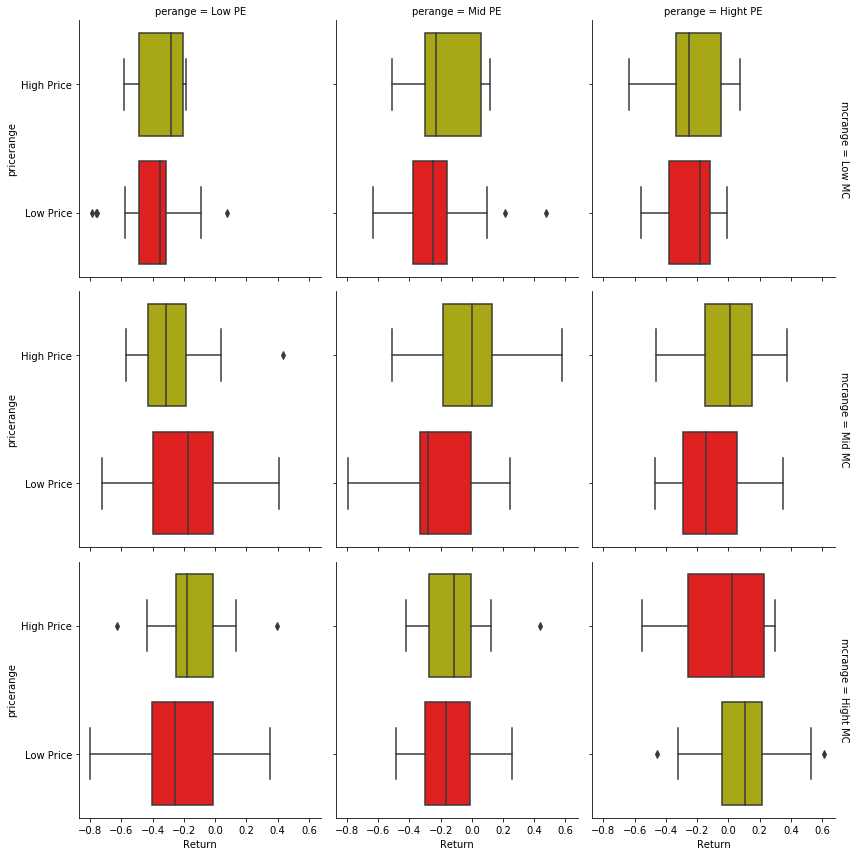

In [53]:
sns.FacetGrid(da2, col="perange",row="mcrange", margin_titles = True, height = 4).map(sns.boxplot, "Return", "pricerange",palette=["r", "y"])


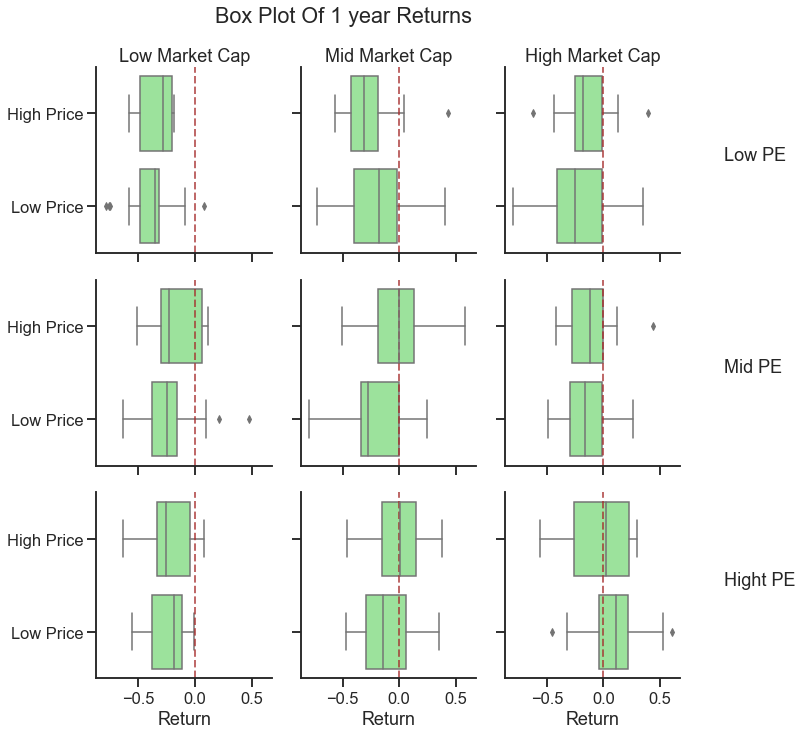

In [57]:
sns.set_style("ticks")
sns.set_context("talk")

g = sns.FacetGrid(da2, row='perange', col='mcrange', margin_titles=True, height=3.5)
g = g.map(sns.boxplot, 'Return','pricerange', order = ['Low Price', 'High Price'], color='lightgreen', linewidth=1.5)
    
for i in range(3):
    for j in range(3):
        g.axes[i][j].axvline(0, linewidth=2, alpha=.7, color="brown",ls='--')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Box Plot Of 1 year Returns')
g.axes.flatten()[0].set_title('Low Market Cap')
g.axes.flatten()[1].set_title('Mid Market Cap')
g.axes.flatten()[2].set_title('High Market Cap')
g.axes[0][0].set_ylabel("")
g.axes[1][0].set_ylabel("")
g.axes[2][0].set_ylabel("")

for ax in g.axes.flat:  
    if ax.texts:
        txt = ax.texts[0]
        ax.text(txt.get_unitless_position()[0],
                txt.get_unitless_position()[1],
                txt.get_text().split('=')[1],)
        ax.texts[0].remove()

g.axes[2,0].set_xlabel("Return")
g.axes[2,1].set_xlabel("Return")
g.axes[2,2].set_xlabel("Return")
        
plt.show()